# logistic regression
logistic regression is a classification algorithm to assign observations to a descreate set of classes
it is a linear model that predicts the probability of an observation belonging to a particular class
it is used for binary classification problems (0/1, yes/no, etc.)


# assumptions of logistic regression
1 the dependant variable must be categorical in nature
2 the should be no outliers in the data


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score,

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, HelmertEncoder, BinaryEncoder, PolynomialFeatures, Binarizer, KBinsDiscretizer, KBinsDiscretizer, KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

ImportError: cannot import name 'HelmertEncoder' from 'sklearn.preprocessing' (c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [8]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    KBinsDiscretizer
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)


In [32]:
# load the dataset of titanic
ship = sns.load_dataset('titanic')

In [13]:
# preprecess the data
# remove the deck column
ship = ship.drop('deck', axis=1, inplace=True)
# impute missing values in age and fare
ship['age'].fillna(ship['age'].median(), inplace=True)
ship['fare'].fillna(ship['fare'].median(), inplace=True)

TypeError: 'NoneType' object is not subscriptable

In [18]:
ship2 = sns.load_dataset('titanic')

In [19]:
# Preprocess the data
# Remove the deck column
import pandas as pd
ship2.drop('deck', axis=1, inplace=True)  # or ship = ship.drop('deck', axis=1)

# Impute missing values in age and fare
ship2['age'].fillna(ship2['age'].mean(), inplace=True)
ship2['fare'].fillna(ship2['fare'].mean(), inplace=True)


In [23]:
ship2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [24]:
# impute missing values in embark and embarked_town
ship2['embarked'].fillna(ship2['embarked'].mode()[0], inplace=True)  # or ship['embark'].fillna(ship['embark'].mode()[0], inplace=T)
ship2['embark_town'].fillna(ship2['embark_town'].mode()[0], inplace=True)

In [25]:
# encoding the categorical variable using for loop where datatype in the columns is object and category
for col in ship2.columns:
    if ship2[col].dtype == 'object' or ship2[col].dtype == 'category':
        ship2[col] = LabelEncoder.fit_transform(ship2[col])



TypeError: LabelEncoder.fit_transform() missing 1 required positional argument: 'y'

In [27]:
#from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical variables
for col in ship2.columns:
    if ship2[col].dtype == 'object' or ship2[col].dtype == 'category':
        ship2[col] = label_encoder.fit_transform(ship2[col])


In [33]:
ship.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
ship2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(6), int64(4)
memory usage: 64.5 KB


In [35]:
ship2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [36]:
ship2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [28]:
ship2.info

<bound method DataFrame.info of      survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0           0       3    1  22.000000      1      0   7.2500         2      2   
1           1       1    0  38.000000      1      0  71.2833         0      0   
2           1       3    0  26.000000      0      0   7.9250         2      2   
3           1       1    0  35.000000      1      0  53.1000         2      0   
4           0       3    1  35.000000      0      0   8.0500         2      2   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
886         0       2    1  27.000000      0      0  13.0000         2      1   
887         1       1    0  19.000000      0      0  30.0000         2      0   
888         0       3    0  29.699118      1      2  23.4500         2      2   
889         1       1    1  26.000000      0      0  30.0000         0      0   
890         0       3    1  32.000000      0      0   7.7500         1      2

In [41]:
X = ship2.drop('survived', axis=1)
y = ship2['survived']

In [37]:
X = ship2.drop('survived', axis=1)
y = ship2['survived']

In [42]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [43]:
# call a model
model = LogisticRegression()

In [44]:
# train a model
model.fit(X_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# predict the model
y_predict = model.predict(X_test)

In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

In [50]:
from sklearn.metrics import recall_score, classification_report

In [47]:
from sklearn.metrics import precision_score

In [49]:
print('accuracy_score:' , accuracy_score(y_test, y_predict))
print('f1_score:' , f1_score(y_test, y_predict, average='macro'))
print('recall_score: ' , recall_score(y_test, y_predict))
print('precision_score: ' , precision_score(y_test, y_predict))


accuracy_score: 1.0
f1_score: 1.0
recall_score:  1.0
precision_score:  1.0


In [51]:
print('classification report: ', classification_report(y_test, y_predict))

classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        80

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



TypeError: Image data of dtype object cannot be converted to float

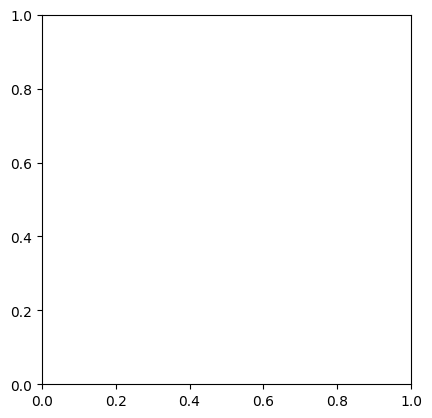

In [54]:
# plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')

In [57]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

#sns.heatmap(confusion_matrix(y_test, y_predict, annot=True, fmt='d'))

ValueError: Must pass 2-d input. shape=()

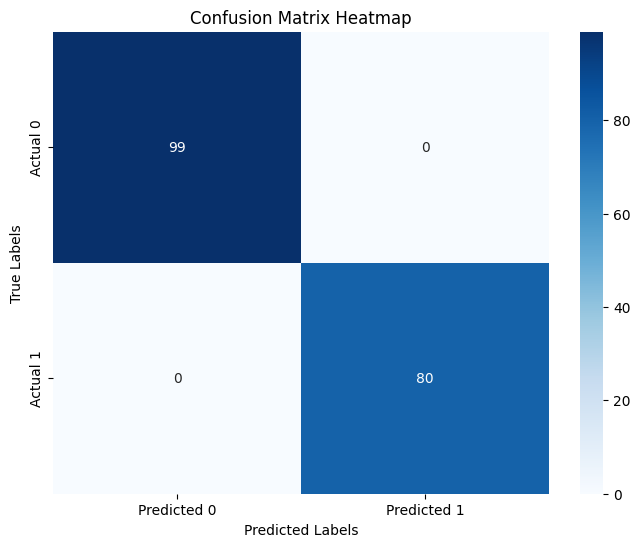

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: adjust the size of the figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [59]:
print('confusion_matrix: ', confusion_matrix(y_test, y_predict))

confusion_matrix:  [[99  0]
 [ 0 80]]


In [60]:
ship['survived'].unique()

array([0, 1], dtype=int64)

In [61]:
ship2['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [62]:
ship['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [63]:
# save the model
import pickle
pickel.dump(model, open(model_pkl2, 'wb'))

NameError: name 'pickel' is not defined

In [64]:
import pickle

In [67]:
pickle.dump(model, open(model_logistic_regression.pkl, 'wb'))

NameError: name 'model_logistic_regression' is not defined

In [68]:
import pickle

# Assuming 'model' is your trained Logistic Regression model
pickle.dump(model, open('model_logistic_regression.pkl', 'wb'))


Each entry in the confusion matrix corresponds to a specific outcome:

True Positives (TP): 99
The model correctly predicted 99 instances as positive (e.g., survived, assuming the positive class represents survival).
----
--------------------
False Positives (FP): 0
The model did not incorrectly predict any instances as positive when they were actually negative (e.g., predicted survived but actually did not survive).
----
-----------------------
False Negatives (FN): 0
The model did not incorrectly predict any instances as negative when they were actually positive (e.g., predicted did not survive but actually survived).
----

---------------------------
True Negatives (TN): 80
The model correctly predicted 80 instances as negative (e.g., did not survive, assuming the negative class represents not surviving).